In [1]:
from src.ElliotWaves.misc.direction import direction
import pandas as pd
import os

# Load

In [2]:
from os import listdir
from os.path import isfile, join
output_dir = "files"
onlyfiles = [join(output_dir, f) for f in listdir(output_dir) if (isfile(join(output_dir, f))) and ("Analitic" in f)]
onlyfiles

['files/Analitic_EURUSD_20150101_20210101_DAILY.csv',
 'files/Analitic_EURUSD_20200107_20210714_DAILY.csv']

In [3]:
df = pd.read_csv(onlyfiles[1],index_col="index").rename(columns={"SubWaveCount":"Count"})
df

,Count,Direction,Full,Wave1 Profit%,Wave2 Profit%,Wave3 Profit%,Wave4 Profit%,Wave5 Profit%
index,,,,,,,,
0,5,Short,True,1.840655,-0.952598,2.494660,-0.296703,0.686573
1,5,Short,True,1.010083,-0.801155,3.167514,-0.296703,0.686573
2,5,Short,True,1.627166,-0.952598,2.494660,-0.296703,0.686573
3,5,Short,True,1.362315,-0.952598,2.494660,-0.296703,0.686573
4,5,Short,True,1.143181,-0.952598,2.494660,-0.296703,0.686573
...,...,...,...,...,...,...,...,...
4898,2,Short,False,0.927594,-0.684792,NaN,NaN,NaN
4899,1,Short,False,0.927594,NaN,NaN,NaN,NaN
4900,1,Short,False,0.885045,NaN,NaN,NaN,NaN


In [4]:
arr = []
for col in df.columns:
    if "Profit%" in col :
        arr.append(["Profit %",col[0:5]])
    else:
        arr.append([col,"Waves"])
df.columns = pd.MultiIndex.from_frame(pd.DataFrame(arr,columns=["Type", "Wave"]))
df.columns

MultiIndex([(    'Count', 'Waves'),
            ('Direction', 'Waves'),
            (     'Full', 'Waves'),
            ( 'Profit %', 'Wave1'),
            ( 'Profit %', 'Wave2'),
            ( 'Profit %', 'Wave3'),
            ( 'Profit %', 'Wave4'),
            ( 'Profit %', 'Wave5')],
           names=['Type', 'Wave'])

In [5]:
df[("Direction","Waves")] = df[("Direction","Waves")].map(lambda el: direction[el])
for col in [cl for cl in df.columns if cl[0]=="Profit %"]:
    df[("Profit abs%",col[1])] = abs(df[col])
df

Type  Count Direction   Full  Profit %                                \
Wave  Waves     Waves  Waves     Wave1     Wave2     Wave3     Wave4   
index                                                                  
0         5     Short   True  1.840655 -0.952598  2.494660 -0.296703   
1         5     Short   True  1.010083 -0.801155  3.167514 -0.296703   
2         5     Short   True  1.627166 -0.952598  2.494660 -0.296703   
3         5     Short   True  1.362315 -0.952598  2.494660 -0.296703   
4         5     Short   True  1.143181 -0.952598  2.494660 -0.296703   
...     ...       ...    ...       ...       ...       ...       ...   
4898      2     Short  False  0.927594 -0.684792       NaN       NaN   
4899      1     Short  False  0.927594       NaN       NaN       NaN   
4900      1     Short  False  0.885045       NaN       NaN       NaN   
4901      2     Short  False  0.885045 -0.684792       NaN       NaN   
4902      1      Long  False  0.684792       NaN       NaN       NaN   

Type            Profit abs%                                          
Wave      Wave5       Wave1     Wave2     Wave3     Wave4     Wave5  
index                                                                
0      0.686573    1.840655  0.952598  2.494660  0.296703  0.686573  
1      0.686573    1.010083  0.801155  3.167514  0.296703  0.686573  
2      0.686573    1.627166  0.952598  2.494660  0.296703  0.686573  
3      0.686573    1.362315  0.952598  2.494660  0.296703  0.686573  
4      0.686573    1.143181  0.952598  2.494660  0.296703  0.686573  
...         ...         ...       ...       ...       ...       ...  
4898        NaN    0.927594  0.684792       NaN       NaN       NaN  
4899        NaN    0.927594       NaN       NaN       NaN       NaN  
4900        NaN    0.885045       NaN       NaN       NaN       NaN  
4901        NaN    0.885045  0.684792       NaN       NaN       NaN  
4902        NaN    0.684792       NaN       NaN       NaN       NaN  

[4903 rows x 13 columns]

# Analitic

## dependence between count of close waves

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('default')

### For all waves

In [7]:
def wave_close_df(close_count:int):
    df_n_plus = df[df[("Count","Waves")]>=close_count]
    ret_df = pd.DataFrame(data={"value_done":df_n_plus[("Profit abs%", f"Wave{close_count}")],"value":df_n_plus[("Profit abs%", f"Wave{close_count+1}")],"dir":df_n_plus[("Direction", f"Waves")],"full":df_n_plus[("Count","Waves")]==5})
    ret_df["count"] = close_count
    return ret_df

In [8]:
sns_df = pd.DataFrame(columns=["value_done","value","dir","full","count"])
for close_count in [1,2,3,4]:
    sns_df = sns_df.append(wave_close_df(close_count))
sns_df["value"] = sns_df["value"].fillna(-1)
sns_df

,value_done,value,dir,full,count
0,1.840655,0.952598,Short,True,1
1,1.010083,0.801155,Short,True,1
2,1.627166,0.952598,Short,True,1
3,1.362315,0.952598,Short,True,1
4,1.143181,0.952598,Short,True,1
...,...,...,...,...,...
4679,0.631882,-1.000000,Short,False,4
4680,1.047611,-1.000000,Short,False,4
4703,0.684792,-1.000000,Short,False,4
4706,0.631882,-1.000000,Short,False,4


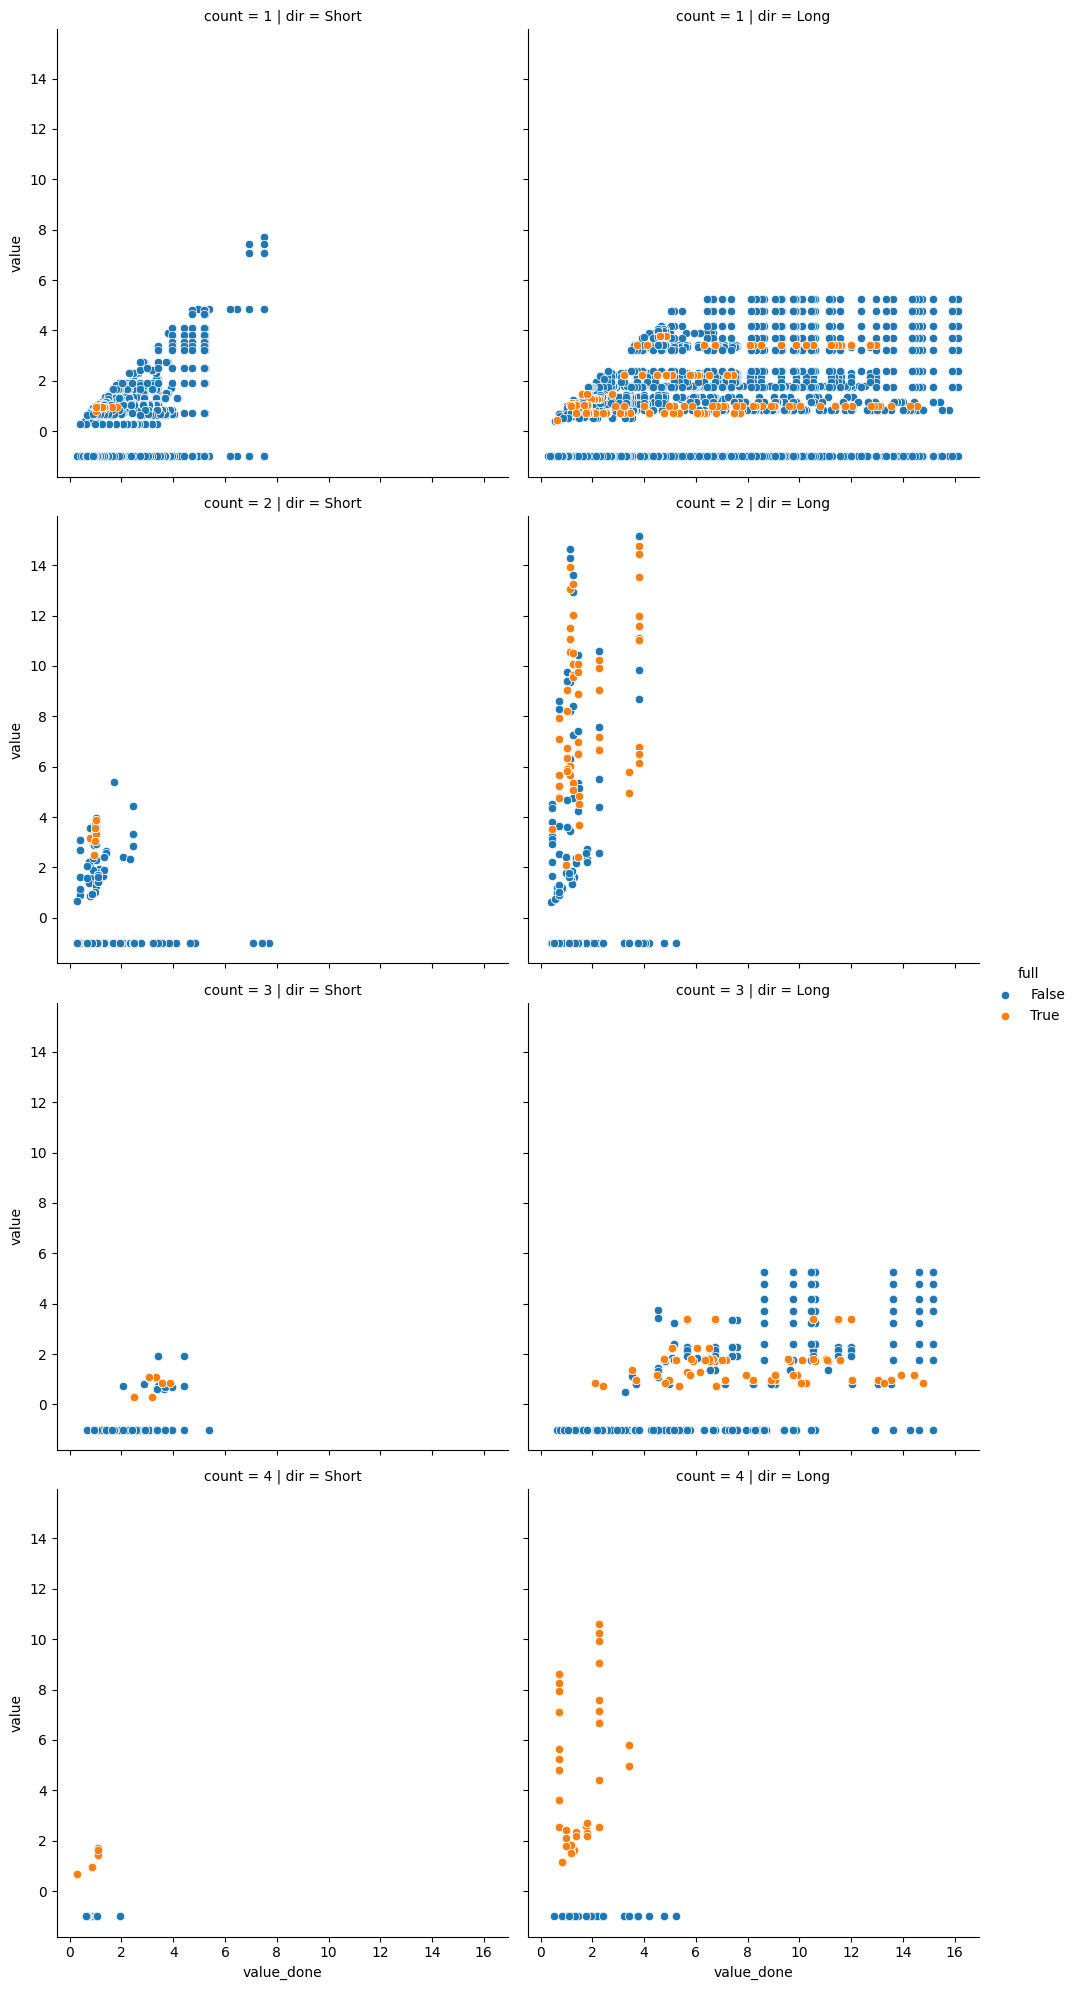

In [9]:
g = sns.FacetGrid(sns_df, row="count",col="dir",hue="full",height=5)
g.map(sns.scatterplot,"value_done", "value")
g.add_legend()

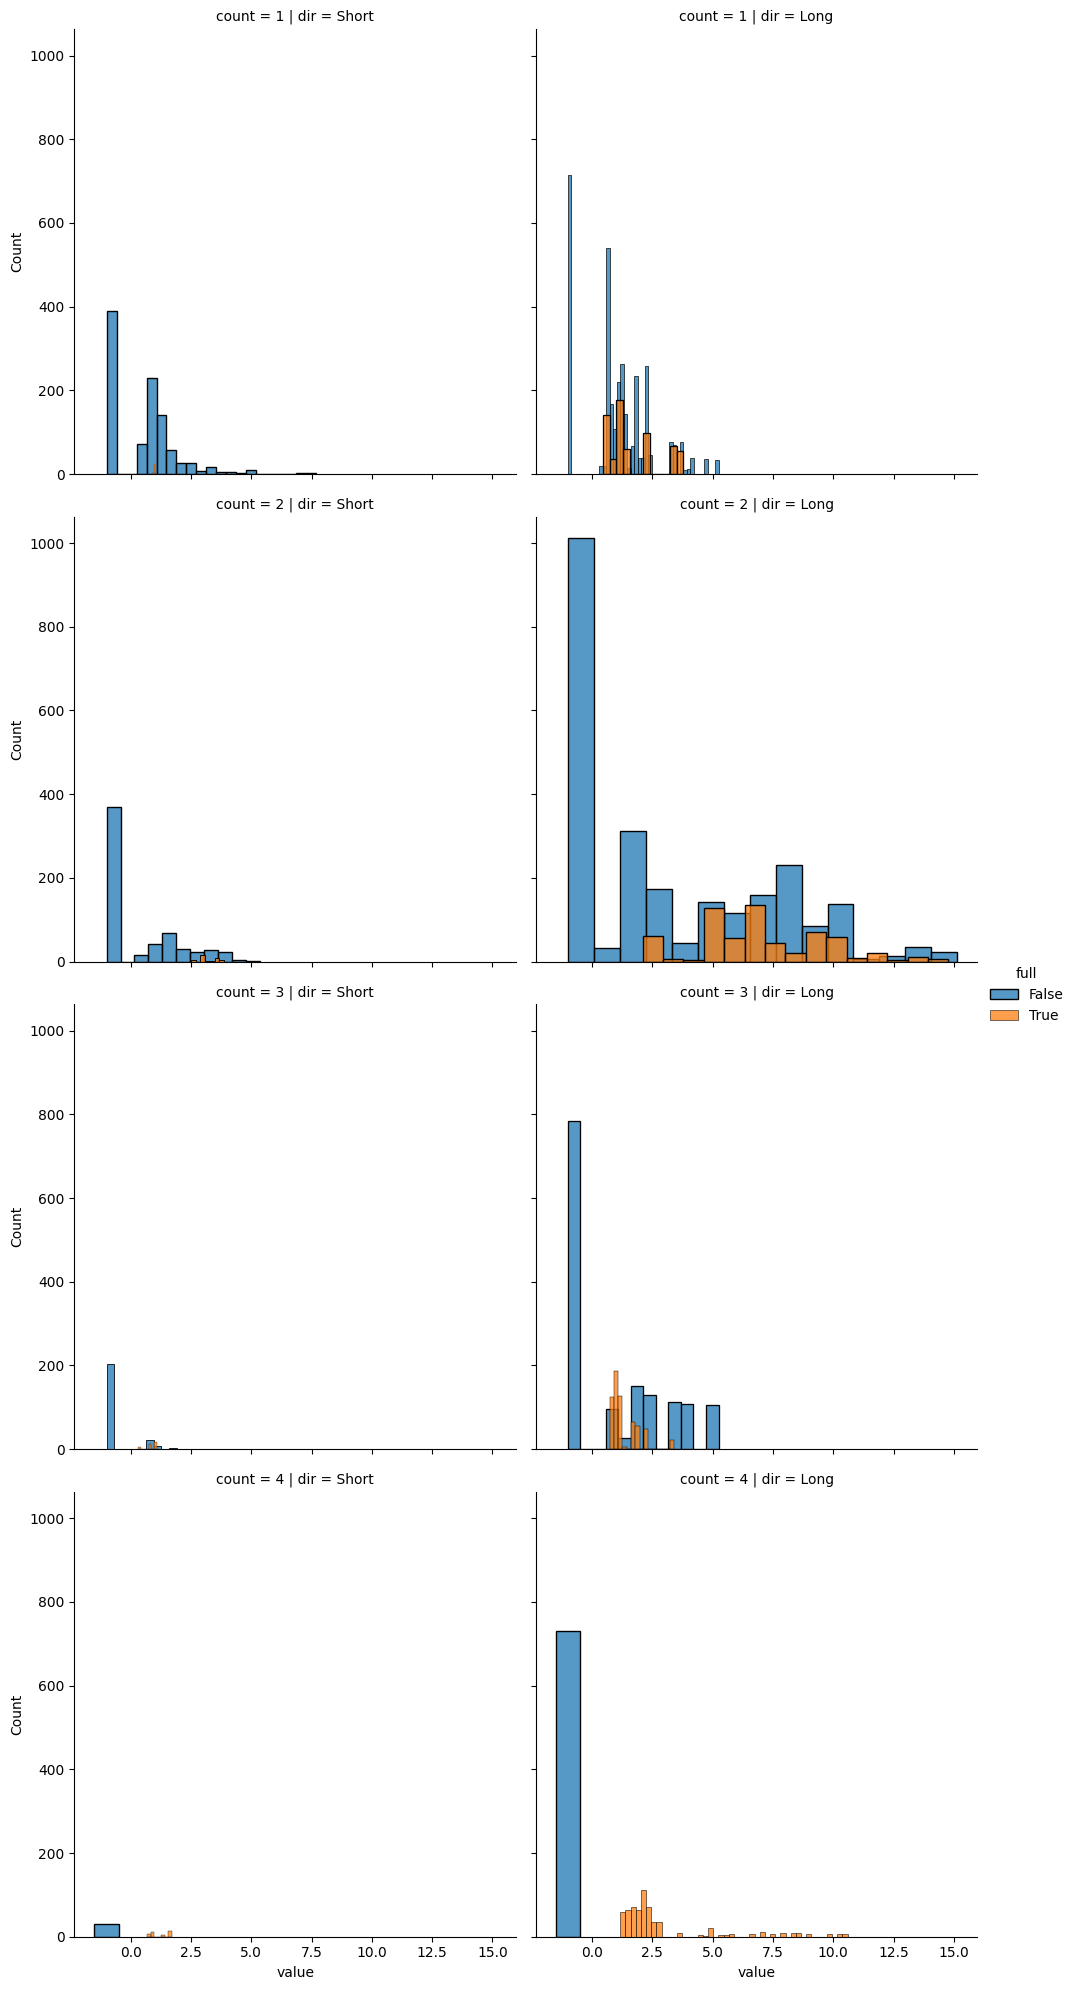

In [10]:
g = sns.FacetGrid(sns_df, row="count",col="dir",hue="full",height=5)
g.map(sns.histplot, "value")
g.add_legend()

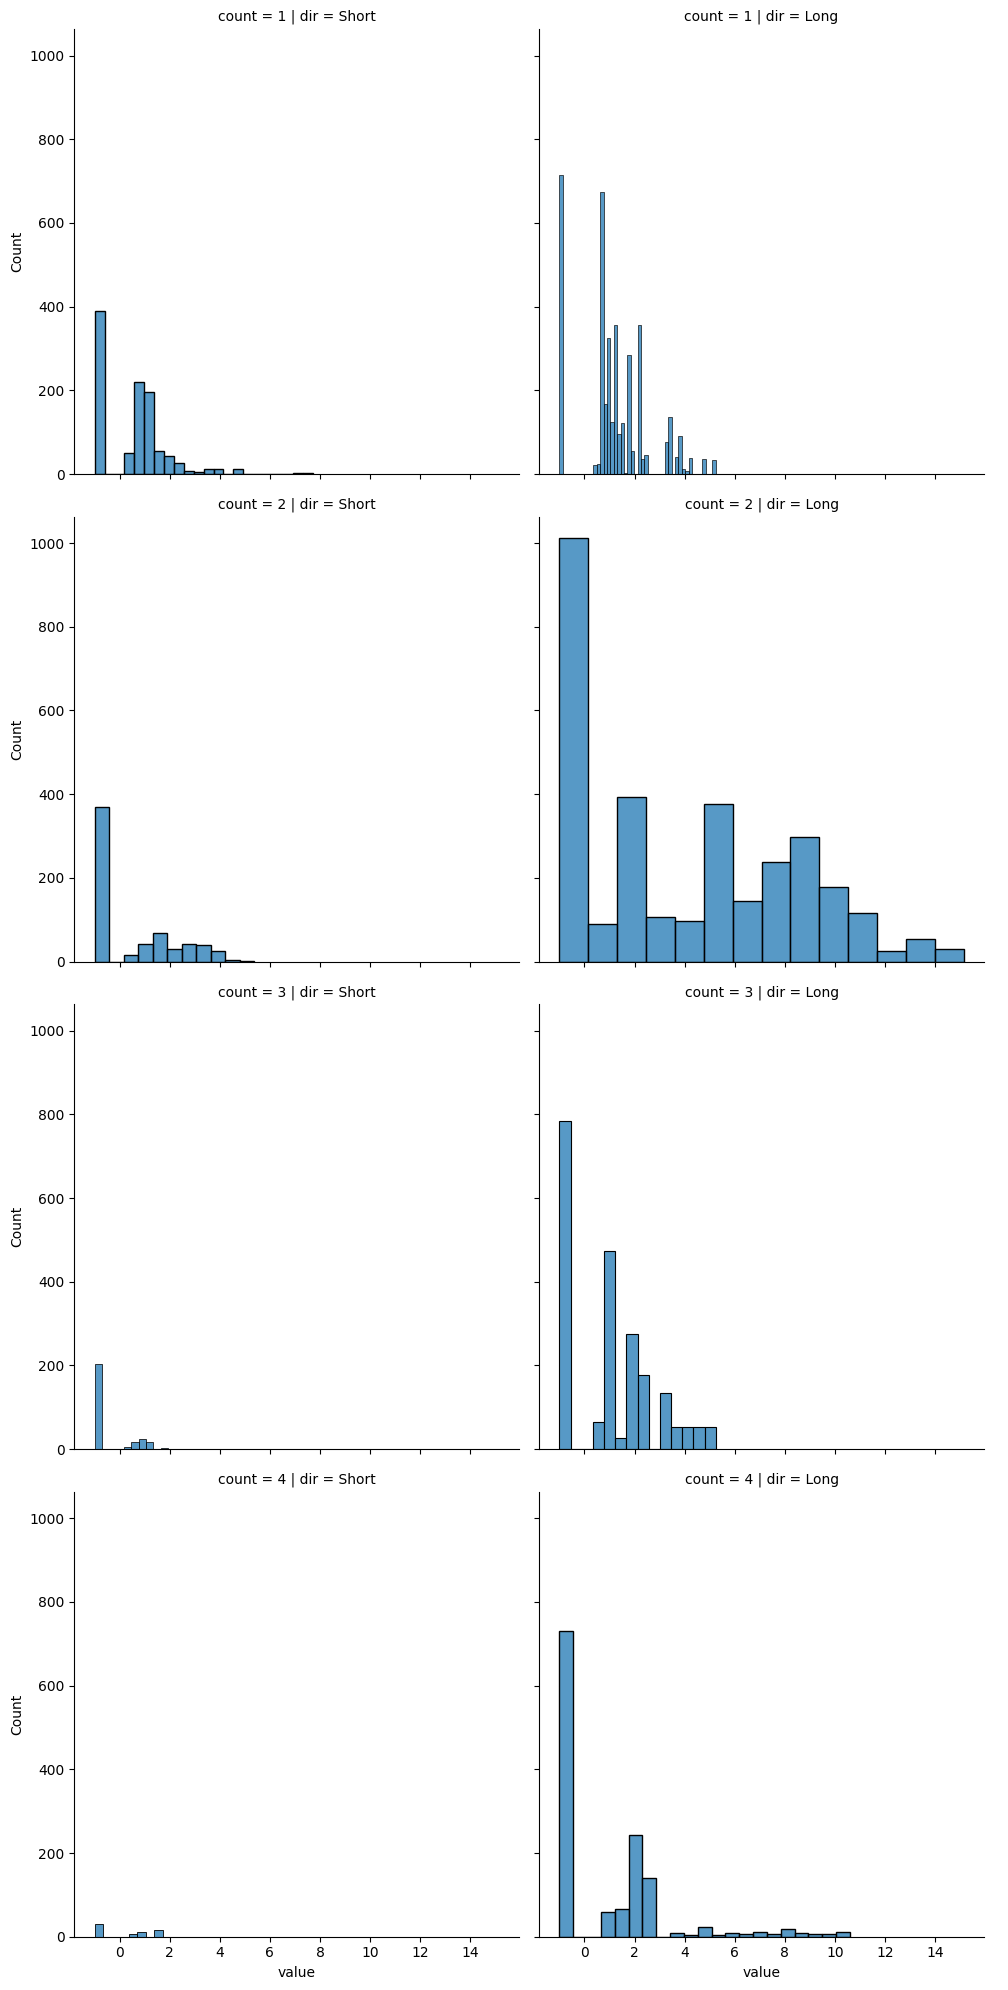

In [11]:
g = sns.FacetGrid(sns_df, row="count",col="dir",height=5)
g.map(sns.histplot, "value")
g.add_legend()